# Syväoppiminen: Osa 1: Perseptroni

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'  # Oma nimesi tai nimet
student_id = 'AB6802' # Oma opiskelijatunnus/tunnukset JAMK:ssa

## Tehtävä 1-1
### Aihe: Onnellisuus, Luokittelija: Perseptroni (max. 4 p)

Tutustu aineistoon **Somerville Happiness Survey Data Set**, jonka saat ladattua osoitteesta
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Esikäsittele aineisto. 
* Huomaa, että tiedosto on UTF-16-enkoodattu.

In [2]:

# Esikäsittelyn Toteutus on kirjoitettu tässä tehtävässä valmiiksi
import pandas as pd

df = pd.read_csv('data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
    'info-availability',
    'cost-of-housing',
    'quality-public-schools',
    'trust-in-local-police',
    'maintenance-of-streets',
    'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Jaa  aineisto koulutus- (67%) ja testausaineistoon (33%) (`X_train`, `y_train`, `X_test`, `y_test`).
Käytä satunnaissiementä `9001`.

In [3]:
# Kirjoita toteutuksesi tähän soluun.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['happy'])
y = df['happy']

#X_train = X_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

print(len(df))

143


In [4]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Lineaarinen perseptroni-luokittelija

1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Tallenna luokittelija `pc`-muuttujaan.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`. Vinkki: `decision_function()`.

3. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

4. Laske regressiolle ROC-arvot `scikit-learn`-kirjaston `metrics`-moduulin avulla. Laske myös ROC-käyrän alainen alue muuttujaa `auc`. Piirrä kynnysarvon optimointikäyrä `matplotlib`-kirjastolla.

5. Kirjoita `pohdinta`-merkkijonomuuttujaan mitä ajatuksia ROC-käyrä ja tarkkuus herättävät.

In [5]:
# TODO: Kirjoita toteutuksesi tähän soluun.
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cr = cm = None

# Manuaalista : The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Tämä paransi hieman tulosta.
pc = Perceptron(class_weight='balanced')

pc.fit(X_train, y_train)

y_score = pc.decision_function(X_test)

y_pred = pc.predict(X_test)

# TODO: luokittelutuloksesi tarkkuus sekä sekaannusmatriisi (confusion matrix)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
#X_test = y_test = None

In [6]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.5625


### Pohdinta

Minulla on ollut hieman väärä käsitys ROC käyrästä ja olenkin nyt käyttänyt aikaa jotta ymmärtäisin sitä paremmin. Luokkaa 0 eli onnettomia ennustettiin huonosti, jolloin roc käyrä ja tarkkuus on heikkoa.

On kuitenkin hämäävää kun luokan 0 accuracy on korkeampi vaikkakin cm näyttää luokassa 0 huonoa menestystä. Tämä johtuu ymmärtääkseni siitä, että arvo katsoo vain ennustuksia joita malli luokitteli luokkaan 0, eikä niitä jotka se sai väärin.
Siis kun malli ennusti arvon luokkaan 0, se oli 75% ajasta oikeassa ja kun mietin tarkemmin niin näinhän se on, sillä 12 arvoa ennustettiin luokkaan 0 ja 9 oli oikein. Keskityinkin näköjään tässä arvossa liikaa oíkeisiin arvoihin.

Luokan 1 accuracy oli huonoa sen takia kun malli ennusti 36 arvoa luokkaan yksi vaikka oikeasti arvot olivat 50/50 jakaumalla. Miksi näin oli? Yleensä kun malli tekee näin, on helppo laittaa ennustuksien epätasapaino datan epätasapainon piikkiin, mutta
tässä se oli jakautunut täysin puoliksi. Mallimme on lineaarinen jaoitukseltaan eli se haluaa piirtää  viivan luokkien väliin. Tämä ei ole kovin hyvä silloin, kun luokat eivät ole lineaarisesti eroteltavissa. Ehkä tässä voisi suoraan päätellä, että malli ei ole hyvä ennustamaan ihmisten onnellisuutta, sillä siitä voisi uskoa ettei onnellisuus ole lineaarisesti jaoiteltavissa ja se on monimutkainen ennustaa. Tämä pohdinta venyi turhan pitkäksi mutta nyt pitää jatkaa seuraavaan tehtävään.

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.42      0.49        24
           1       0.55      0.71      0.62        24

    accuracy                           0.56        48
   macro avg       0.57      0.56      0.55        48
weighted avg       0.57      0.56      0.55        48

Confusion matrix:
 [[10 14]
 [ 7 17]]


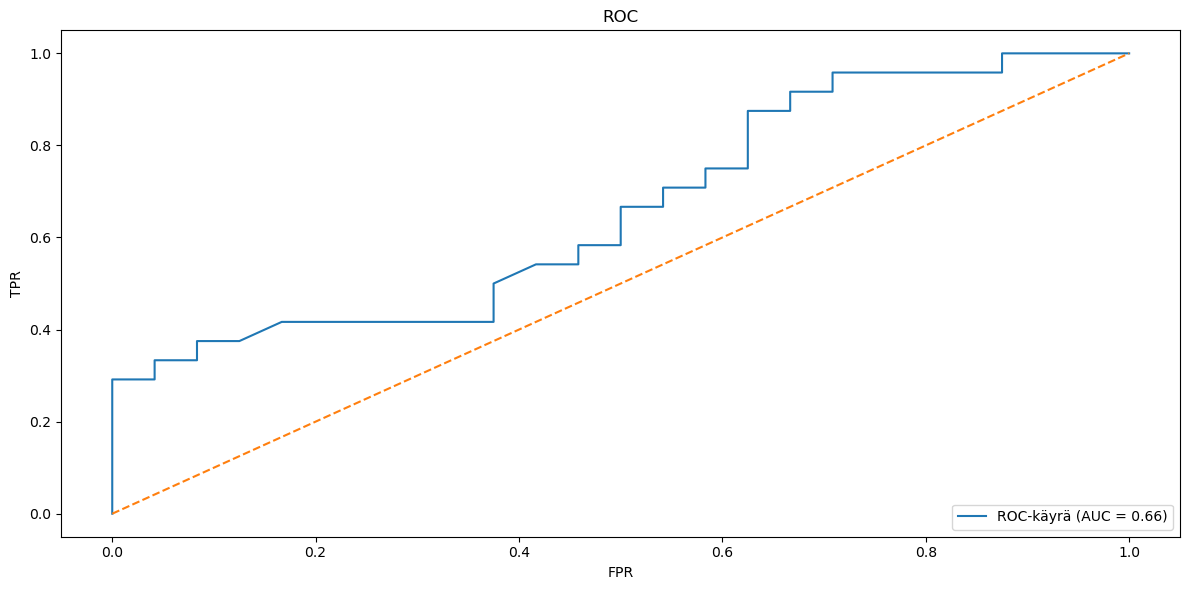

In [7]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla myös kaaviokuva.

#cr = cm = auc = fig = None

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
#print(f'auc: {auc}')
#print(f'Pohdinta: {pohdinta}')

# TODO: Visualisoi tulokset
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# AUC = area under curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#print(tpr)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(fpr, tpr, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], linestyle='--')
ax1.set_title('ROC')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend(loc='lower right')


plt.tight_layout()
plt.show()


## Tehtävä 1-2
### Aihe: Uutisryhmien viestit, Luokittelija: Perseptroni (max. 3 p)

Tarkista seuraava aineistoon, josta data ladataan:

* `sklearn.datasets.fetch_20newsgroups`

Nämä aineistot sisältävät 20 uutisryhmään lähetetyt viestit. Aineistoja ei tarvitse esikäsitellä ollenkaan.
Luokituksessa käytetään tässä tehtävässä seuraavia luokkia:

* _categories_: `['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* _categories_2_: `['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

Huomaa, että aineisto on jo valmiiksi jaettu testi- ja koulutusaineistoon (`fetch_20newsgroups(subset)`). `test \ train` jako siis tehty.

Käytä tehtävissä seuraavia muuttujia koulutus- ja testiaineistojen kanssa (`"X_train", "y_train", "X_test", "y_test"`).

Muunna sekä koulutus- että testidataa `TfidfVectorizer`-luokan menetelmillä.
* Skaalaus ei ole tarpeen tämän jälkeen
* Tulosta tavalliseen tapaan datanäytteitä nähdäksesi, ovatko arvot oikeassa skaalassa välillä **0-1**.



In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
# oli taas ensin vähän hämmennystä kunnes jatkoin kolmoseen...
#categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

#all_categories = categories + categories_2

# TODO: aseta valittavan testijoukon nimi (subset) ja kategoriat (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                              remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                             remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()

# TODO: Muunna koulutusaineisto numeeriseksi fit_transform()-metodilla.
# TODO: Muunna myös testiaineisto transform()-metodia käyttäen.

X_train = vectorizer.fit_transform(ng_train.data)
y_train = ng_train.target

X_test = vectorizer.transform(ng_test.data)
y_test = ng_test.target

#print(X_train[:3])
#print(X_test[:3])

1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Tallenna luokittelija `pc`-muuttujaan. Käytä satunnaissiementä `12501`.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`.

3. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

In [9]:
# TODO: Kirjoita toteutuksesi tähän soluun.

cr = cm = None

pc = Perceptron(random_state=12501, n_iter_no_change=50)

pc.fit(X_train, y_train)

y_score = pc.decision_function(X_test)

y_pred = pc.predict(X_test)

# TODO: luokittelutuloksesi tarkkuus sekä sekaannusmatriisi (confusion matrix)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [10]:
# Tehtävän vastauksien ajaminen. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(cm)  # verrataan toteutuneita arvoja ennusteisin
print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.33986946 -0.35453969]
 [-0.3811092  -0.15419101 -0.01741706]
 [ 0.13018903 -0.92359727 -0.43527784]
 ...
 [ 0.01711722 -0.12477295 -0.23293169]
 [-0.77755308 -0.74918322  0.59417642]
 [ 0.21410956 -0.07639056 -0.1688701 ]]
Perceptron average test accuracy: 0.8573825503355704
[[369  15  12]
 [ 42 304  51]
 [ 24  26 349]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       396
           1       0.88      0.77      0.82       397
           2       0.85      0.87      0.86       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Piirretään kuva sekaannusmatriisista

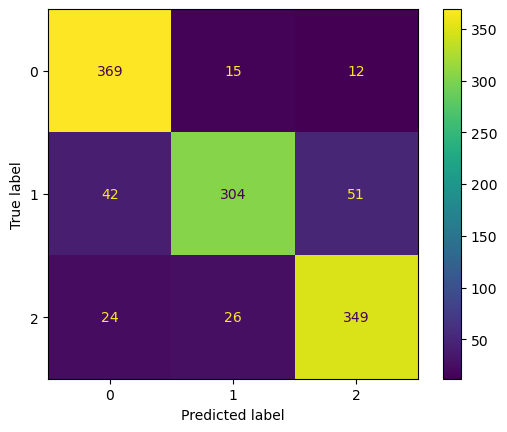

In [11]:
# TODO: sekaannusmatriisin piirtäminen
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Tehtävä 1-3
### Aihe: Uutisryhmien viestit, osa II (max. 2 p)

Toteuta sama tehtävä kuin kohdassa 1-2, mutta toisella `categories_2` -kategorialistalla. Tarkoitus on myös verrata sanallisesti tehtävistä 1-2 ja 1-3 saatuja tuloksia toisiinsa. 
  
* **Pohdinta**: Vertaa uutisryhmien opetustuloksia tehtävissä 1-2 sekä 1-3 toisiinsa ja pohdi sanallisesti, että mistä mahdolliset erot saaduissa tuloksissa johtuvat.



In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# TODO: aseta valittavan testijoukon nimi (subset) ja kategoriat (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories_2,
                              remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories_2,
                             remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()

# TODO: Muunna opetusaineisto fit_transform()-metodilla
# TODO: Muunna myös testiaineisto transform()-metodia käyttäen.
X_train = vectorizer.fit_transform(ng_train.data)
y_train = ng_train.target

X_test = vectorizer.transform(ng_test.data)
y_test = ng_test.target

#print(X_train[:3])
#print(X_test[:3])

cr = cm = None

pc = Perceptron(random_state=12501, n_iter_no_change=50)

pc.fit(X_train, y_train)

y_score = pc.decision_function(X_test)

y_pred = pc.predict(X_test)

# TODO: luokittelutuloksesi tarkkuus sekä sekaannusmatriisi (confusion matrix)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [13]:
# Tehtävän vastauksien ajaminen. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))  # verrataan toteutuneita arvoja ennusteisin
print(classification_report(ng_test.target, y_pred))

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.84276273 -0.58382861 -0.68569055]
 [-0.16948789 -0.9475009   0.14387541]
 [-0.29073026  0.14921917 -0.13198545]
 ...
 [ 0.38981809 -0.45068785 -0.68508433]
 [-0.70800712  0.83958095 -1.17308054]
 [-0.38586745 -0.02650655 -0.7740586 ]]
Perceptron average test accuracy: 0.7283531409168081
[[305  43  41]
 [ 84 286  24]
 [ 78  50 267]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       389
           1       0.75      0.73      0.74       394
           2       0.80      0.68      0.73       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



Sekaannusmatriisin piirtäminen `categories_2` -datalla:

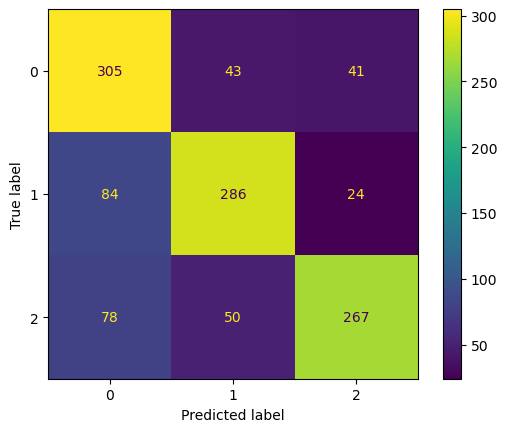

In [14]:
# TODO: sekaannusmatriisin piirtäminen
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Tulosten pohdinta 

* **TODO**: POHDINTA TULOKSISTA. 
* **TODO**: MISTÄ EROT SAADUISSA TULOKSISSA JOHTUVAT?

Ensimmäisten kategorioiden ennustus onnistui paremmin, kuin toisten. Ensimmäinen ajastus mikä tulee mieleen on, että toisen kategorian luokissa voisi olla enemmän päällekkäisyyksiä viestin sisällöissä kuin ensimmäisissä.

Toisissa oli tietokoneisiin liittyviä viestejä, ja aiheina grafiikkajuttuja, Microsoftin Windows sekä "X Window System on bittikarttanäytöille kehitetty ikkunointijärjestelmä". Kun miettii miten itse näistä keskustelisi, ja katsoo matriisia, niin on hyvin loogista että esim luokkaa 0 ennustetiin paljon muihinkin luokkiin ja yhteensä 467 kertaa. Luokkiin 1 ja 2 varmasti mahtuu paljon grafiikka aiheista keskustelua, jolloin malli voi sekoittaa näitä. Sama logiikka pätee myös ristiin useammalla yhtälölle tässä matriisissa.

Ensimmäisessä luokassa oli 'rec.sport.hockey', 'rec.sport.baseball', 'rec.autos. Vaikkakin nämäkin aiheet mahtuvat saman otsikon alle, niin käytännön keskustelut sekä viestin sisällöt voivat poiketa toisistaan enemmän. baseballia ennustettiin eniten väärin, mutta en nää yhtä selkeää syytä kuin toisessa ryhmässä. On loogista miksi autoa ei ennustettu niin paljoa väärin, muttta on erikoista miksi jääkiekon ja baseballin ero on noin selkeä. Ehkä jääkiekkoon liittyneet viestit oltiin tuotu vahvemmin esille tähän liittyvään konteksiin, jolloin virheitä ei tullut niin paljoa. Jääkiekkossa voisi olla enemmmän harvinaisempia lajikohtaisia sanoja?

Yleisesti kuitenkin luokkien ennustus onnistui mielestäni paremmin kuin aivan ensimmäisessä tehtävässä. Tämä voisi johtua siitä mitä aijemmin arvelin: ihmisten onnillisuutta on huomattavasti vaikempi ennustaa viivaa piirtämällä kuin sanoin kirjoitettuja viestejä.